###  To perform market segmentation and transform marketing department by using K-means algorithms, and PCA / Autoencoders for dimensionality reduction.

In [42]:
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df.head(4)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12

In [3]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
# Check missing data
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Imputation of 'MINIMUM_PAYMENT' and 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
# Check duplicated data
creditcard_df.duplicated().sum()

0

In [8]:
# Drop Customer ID (no meaning) 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

### Perform EDA, visualize with distplot, histograms and KDE.

C:\Users\Sealion\AppData\Local\Continuum\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sealion\AppData\Local\Continuum\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sealion\AppData\Local\Continuum\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

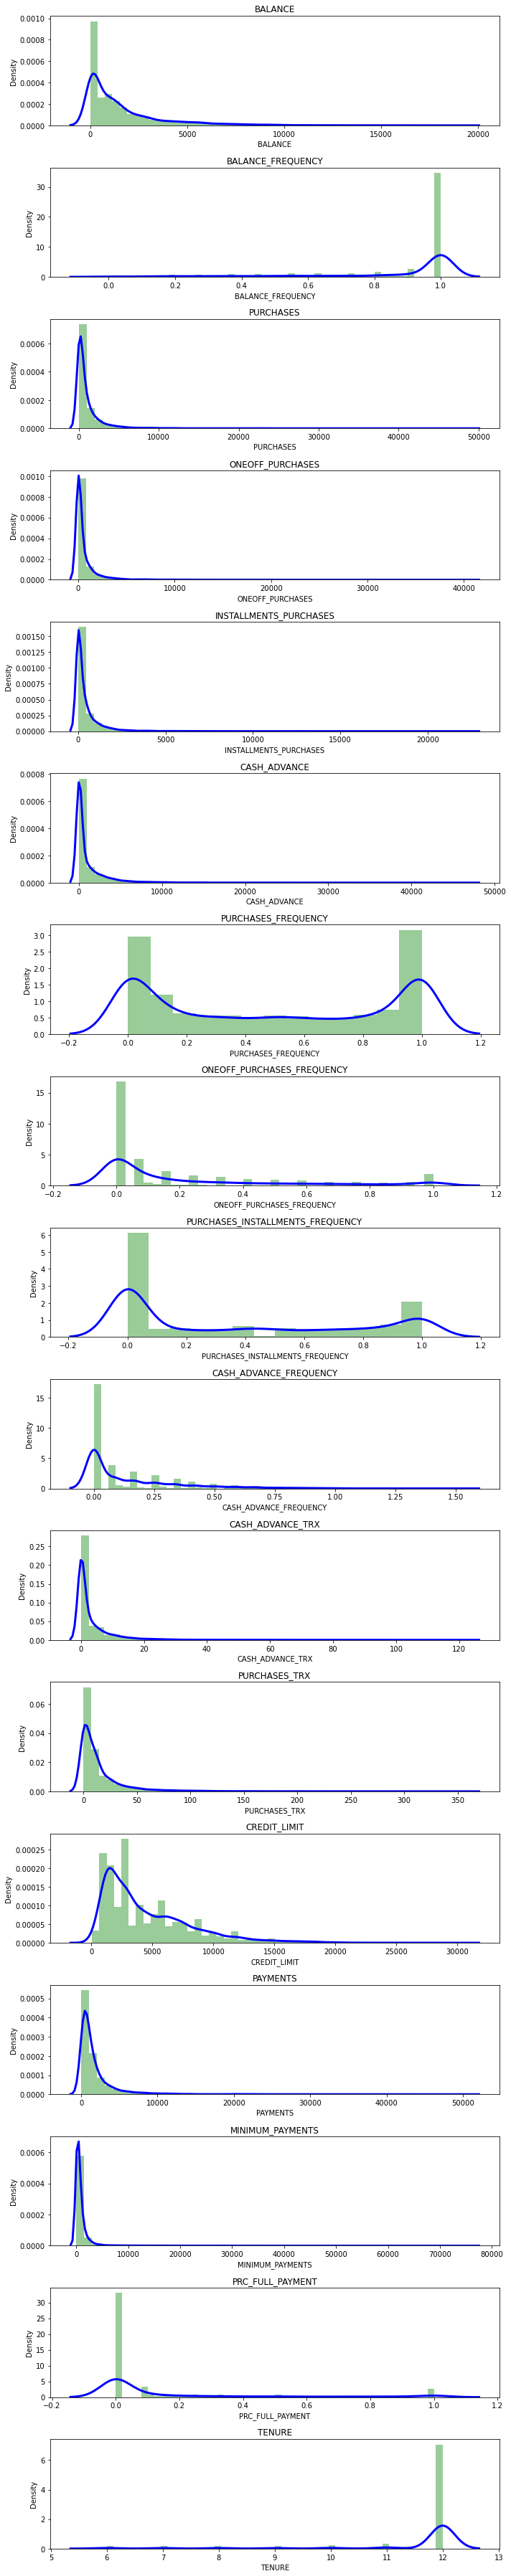

In [9]:
# Distplot combines the matplotlib.hist function with seaborn kdeplot()
# Kernel Density Estimate (KDE)

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

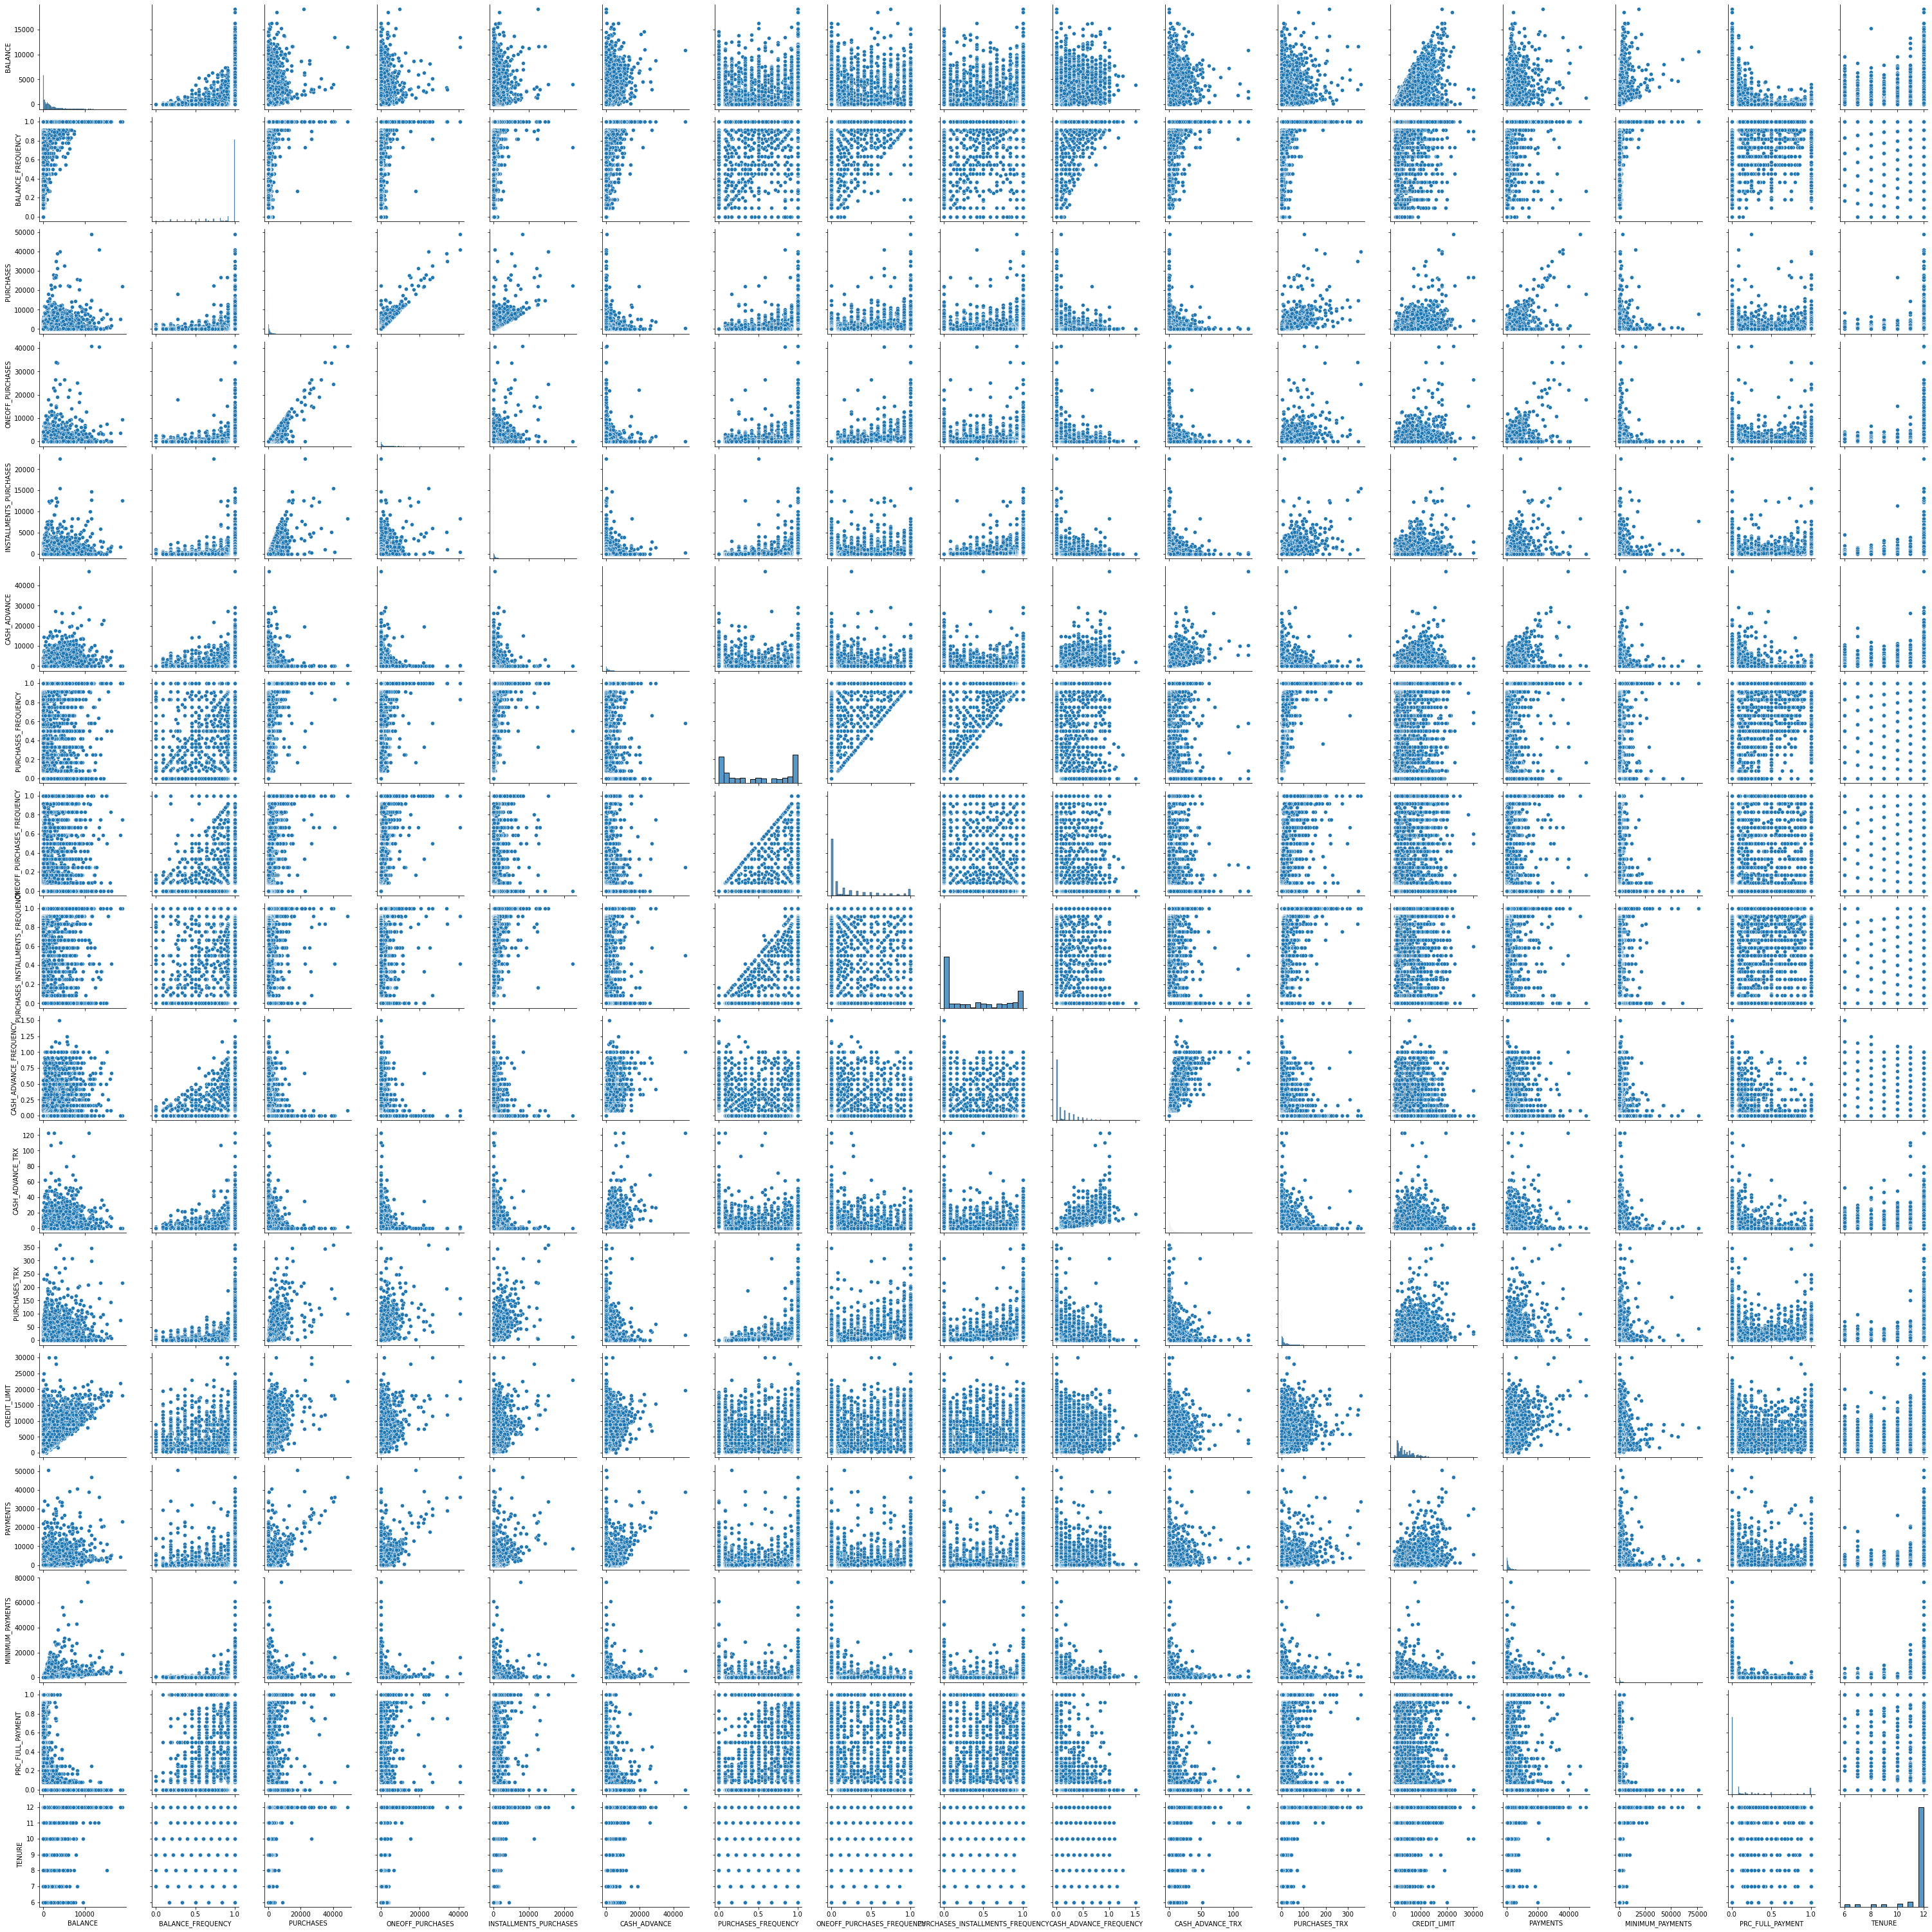

In [10]:
sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

<AxesSubplot:>

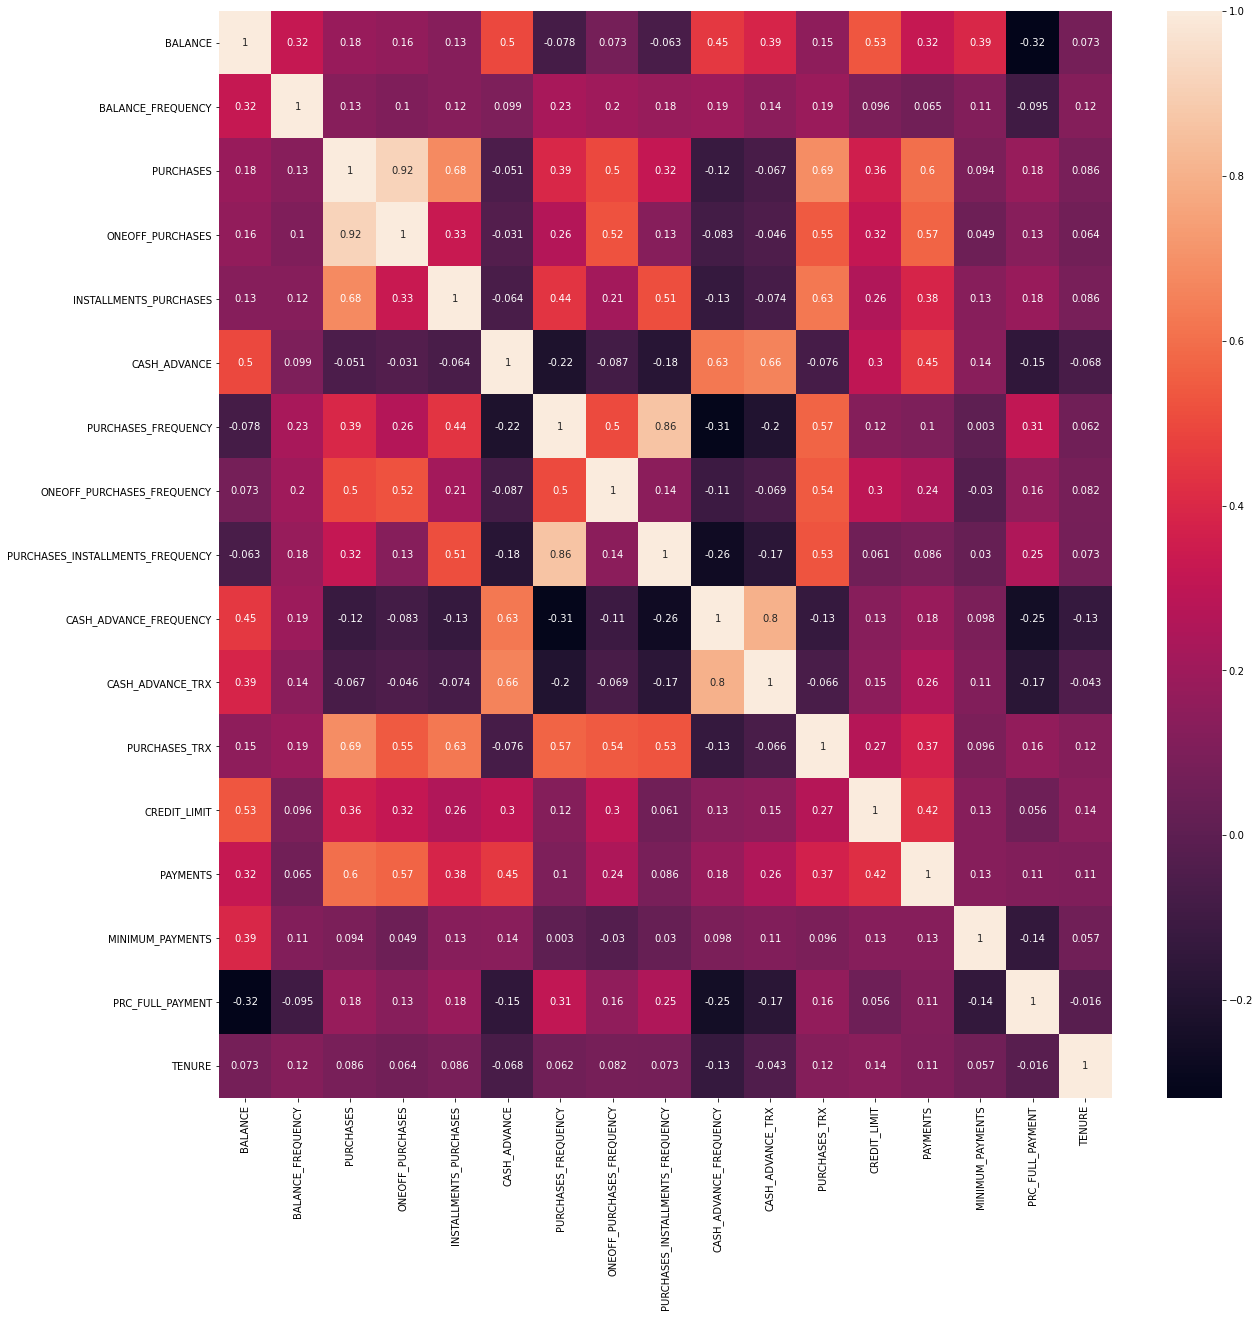

In [11]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

### K-model model and k value 

In [44]:
# Data scaling
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
print(creditcard_df_scaled.shape)

print(creditcard_df_scaled)

(8950, 17)
[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


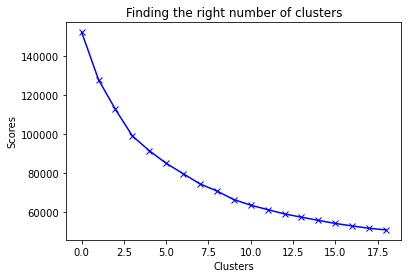

In [14]:
# Elbow method for cluster (k) values
scores_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [15]:
# Choose the number of clusters to be 8.
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(8, 17)

In [16]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers  

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.165967          0.392988   0.473474         0.617563   
1  0.025974          0.404374  -0.361566        -0.246690   
2 -0.366025          0.333613  -0.039458        -0.244688   
3  1.923051          0.337717  11.212042        10.600367   
4 -0.701222         -2.139409  -0.310833        -0.235565   
5  1.706890          0.392242  -0.214522        -0.153942   
6  0.934901          0.467049   2.252953         1.707412   
7 -0.336717         -0.351618  -0.289556        -0.216192   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.015198    -0.333687            0.946907   
1              -0.401593    -0.081140           -0.867102   
2               0.356050    -0.364830            0.988300   
3               7.033118     0.419625            1.046983   
4              -0.302072    -0.322522           -0.555428   
5              -0.224484     2.050093           -0.472407   
6               2.190297    -0.192704            1.160751   
7              -0.287105     0.068131           -0.204713   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   1.883439                         0.091623   
1                  -0.409816                        -0.759019   
2                  -0.387633                         1.203793   
3                   1.915501                         0.981334   
4                  -0.443021                        -0.439828   
5                  -0.209823                        -0.409080   
6                   1.548096                         1.257221   
7                  -0.289287                        -0.225660   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.407826        -0.324229      0.533006     0.379289   
1               0.121296        -0.016248     -0.486573    -0.298143   
2              -0.476064        -0.361952      0.185750    -0.260447   
3              -0.258912         0.061229      5.362438     3.044064   
4              -0.521634        -0.376396     -0.419502    -0.177998   
5               1.941162         1.966831     -0.262375     1.040069   
6              -0.310075        -0.208712      2.800594     1.235324   
7               0.308086         0.000466     -0.388444    -0.566467   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.099871        -0.162866         0.417181  0.262625  
1 -0.245661        -0.002667        -0.456207  0.271546  
2 -0.218550        -0.046209         0.312050  0.257637  
3  8.098975         1.120318         1.110132  0.310863  
4 -0.202299        -0.257071         0.280448  0.202001  
5  0.839280         0.522124        -0.390471  0.067089  
6  1.282259         0.575854         0.273318  0.333736  
7 -0.392990        -0.208809         0.013145 -3.202809

In [17]:
# Perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  1219.028233          0.970366   2014.788633      1617.464652   
1  1618.536741          0.973063    230.712989       182.982225   
2   802.625328          0.956301    918.901369       186.305476   
3  5567.142164          0.957273  24957.905000     18186.875667   
4   104.939796          0.370465    339.104814       201.448528   
5  5117.222857          0.970189    544.875018       336.925917   
6  3510.393168          0.987910   5816.674519      3426.390962   
7   863.627544          0.793976    384.563451       233.602408   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             397.323982   279.113521            0.870390   
1              47.911840   808.716987            0.142340   
2             733.038988   213.805260            0.887003   
3            6771.029333  1858.844605            0.910556   
4             137.907386   302.527006            0.267430   
5             208.069420  5278.012480            0.300751   
6            2391.725865   574.762188            0.956216   
7             151.442584  1121.745122            0.408189   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.764324                         0.400851   
1                   0.080202                         0.062784   
2                   0.086819                         0.842856   
3                   0.773889                         0.754444   
4                   0.070296                         0.189639   
5                   0.139863                         0.201859   
6                   0.664285                         0.864089   
7                   0.116158                         0.274754   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.053534         1.036199     27.958371   5874.459070   
1               0.159417         3.137944      2.615441   3409.684108   
2               0.039879         0.778770     19.326885   3546.835418   
3               0.083333         3.666667    148.000000  15570.000000   
4               0.030760         0.680203      4.282572   3846.818481   
5               0.523590        16.671006      8.188166   8278.644432   
6               0.073095         1.824519     84.322115   8989.062500   
7               0.196795         3.252006      5.054575   2433.410031   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   2022.259600       484.654926         0.275733  11.868778  
1   1021.979496       857.990668         0.020282  11.880717  
2   1100.463867       756.517752         0.244984  11.862103  
3  25178.882690      3475.059479         0.478409  11.933333  
4   1147.508187       265.114438         0.235741  11.787648  
5   4162.777684      2080.994542         0.039508  11.607101  
6   5445.158665      2206.210364         0.233656  11.963942  
7    595.475430       377.585275         0.157559   7.231140

In [18]:
# Labels associated to each data point
print(labels.shape) 
print(labels.max(), labels.min())

(8950,)
7 0


In [19]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([7, 0, 3, ..., 5, 5, 5])

In [20]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        5  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        864.206542          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

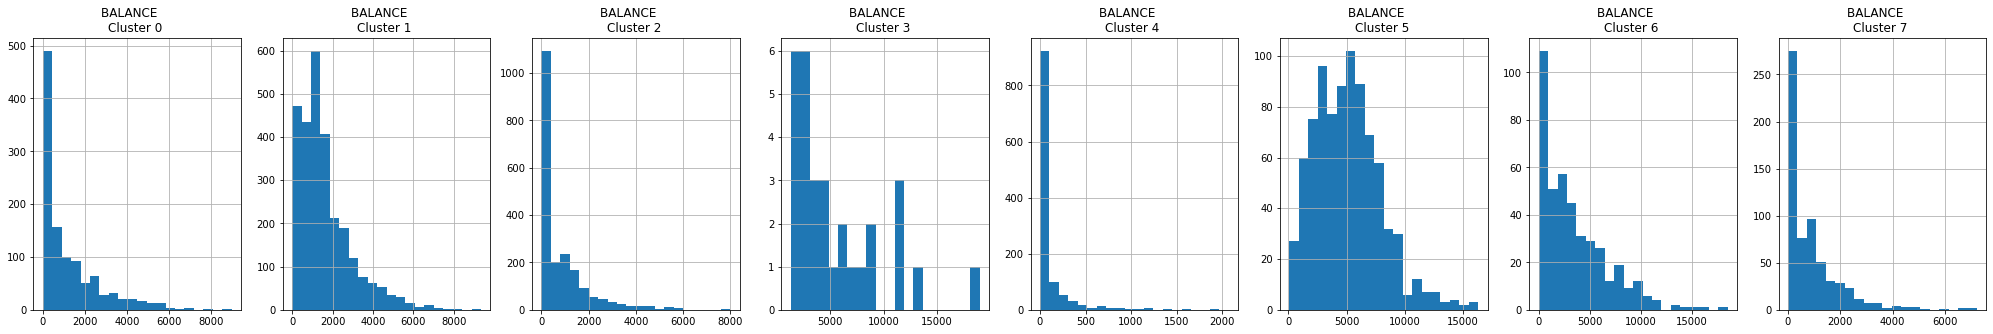

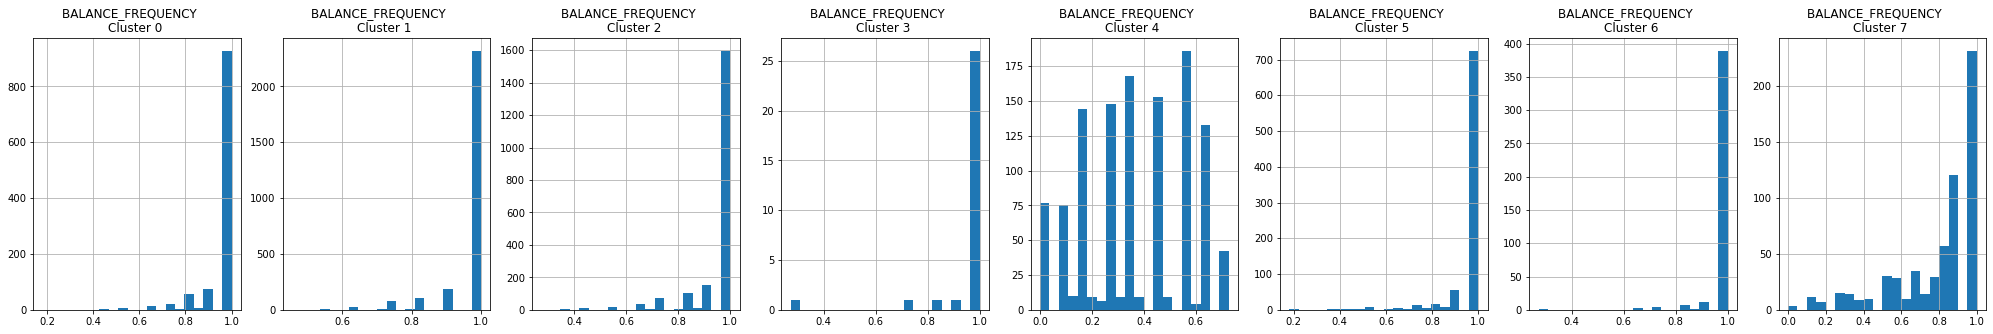

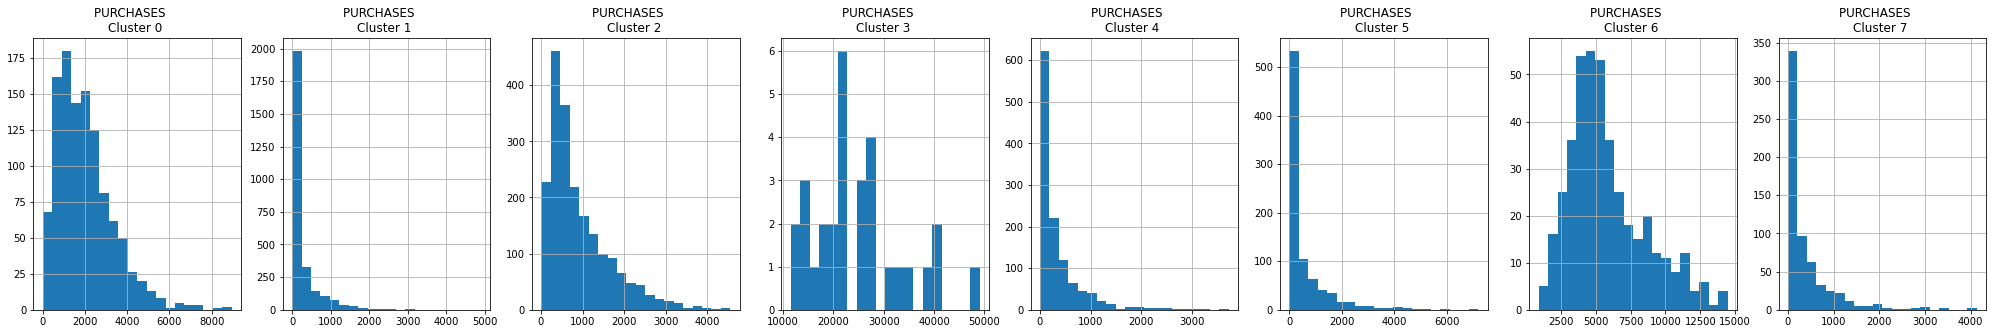

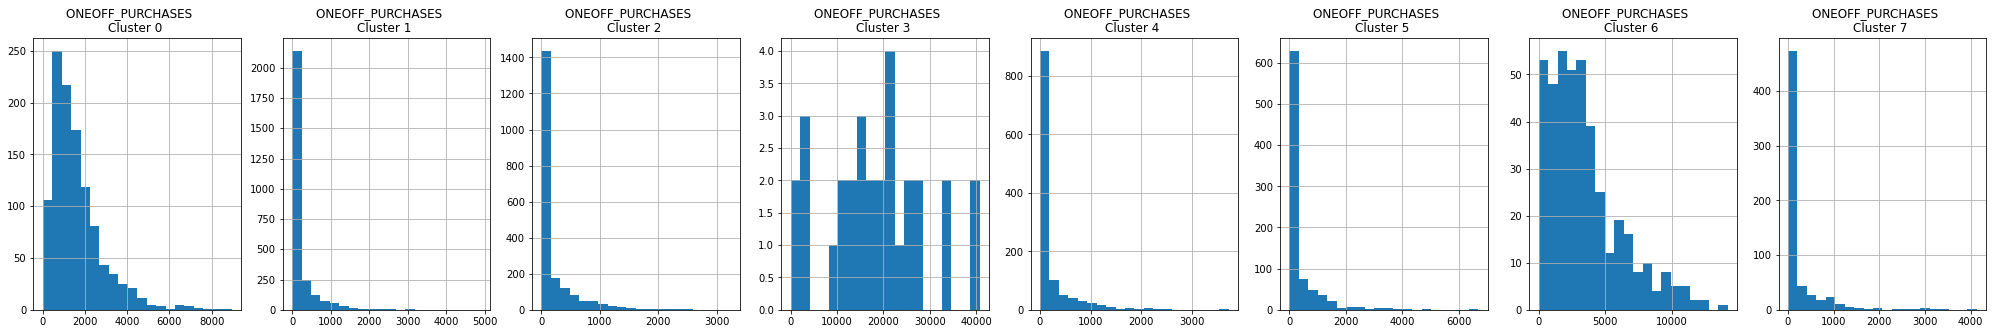

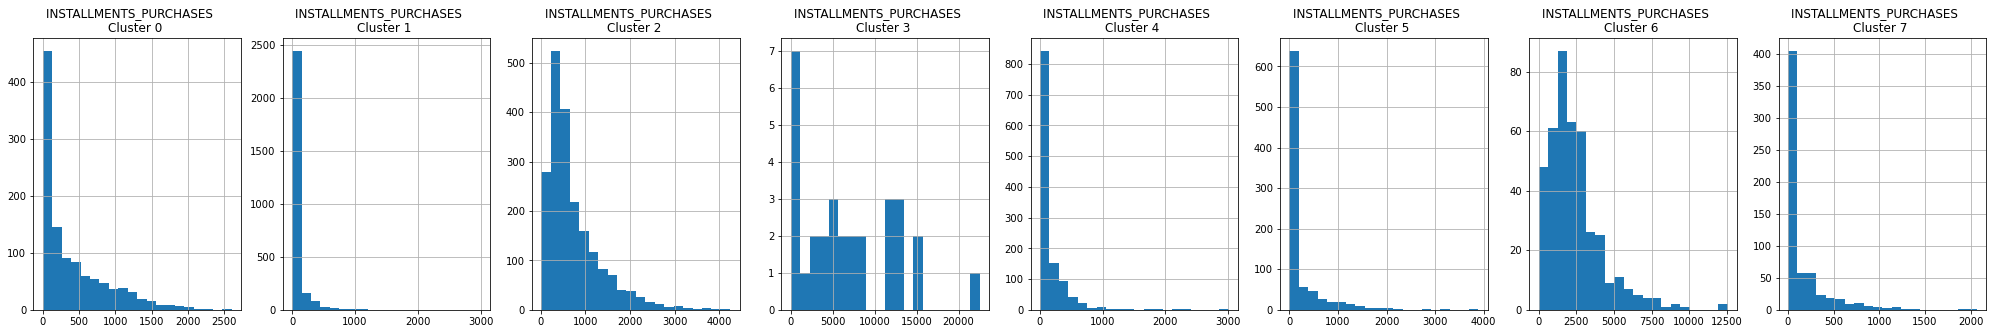

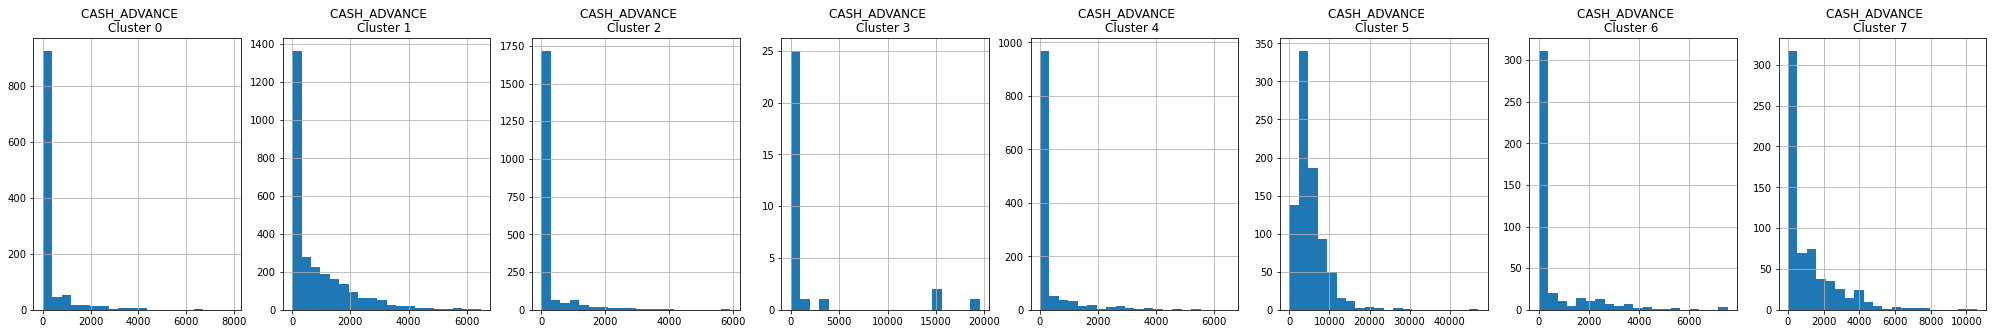

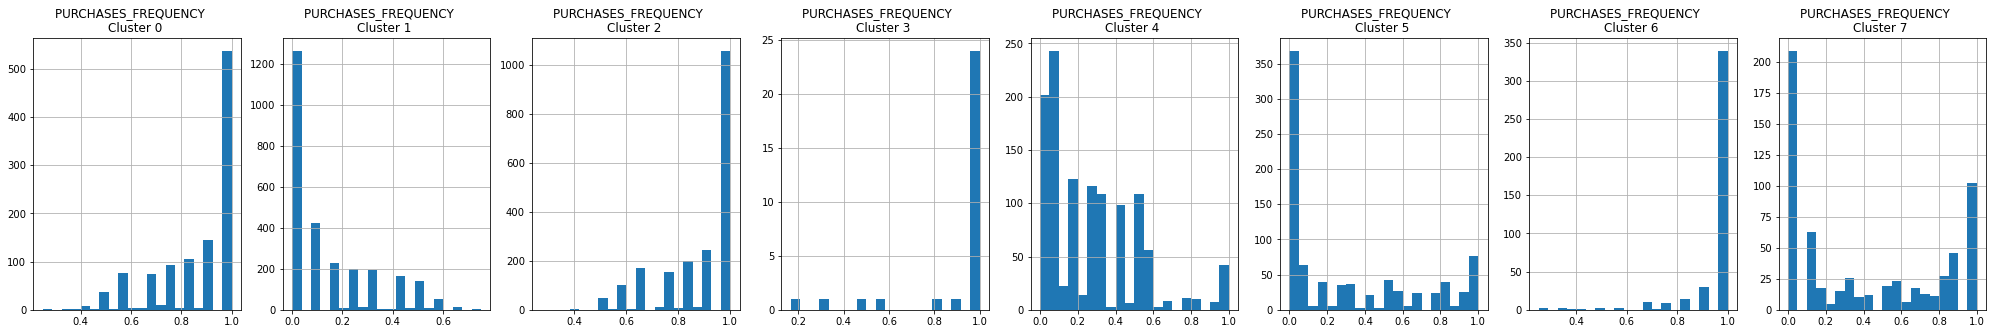

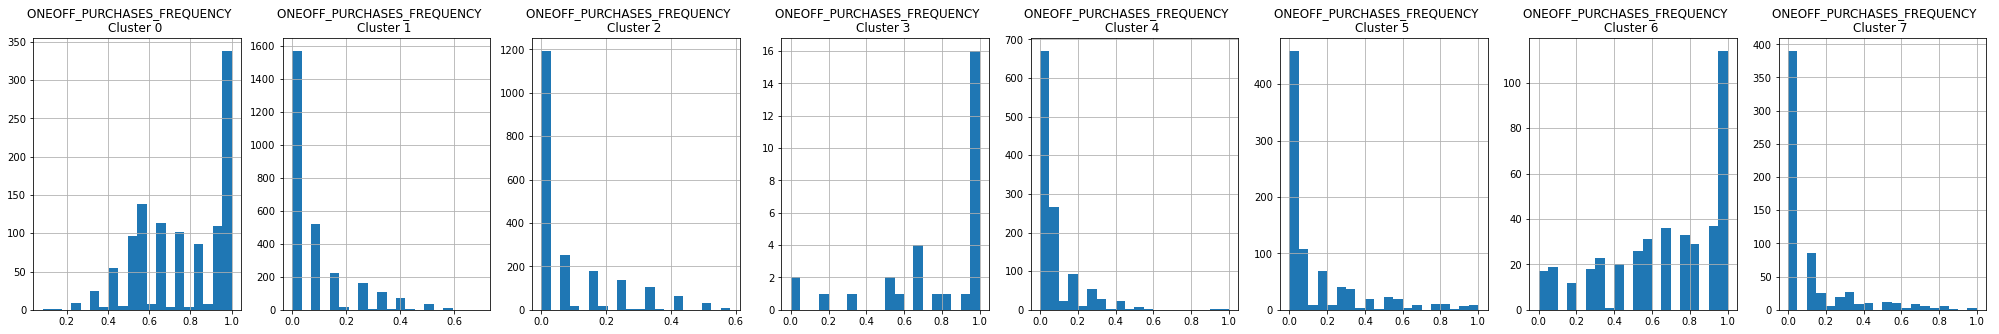

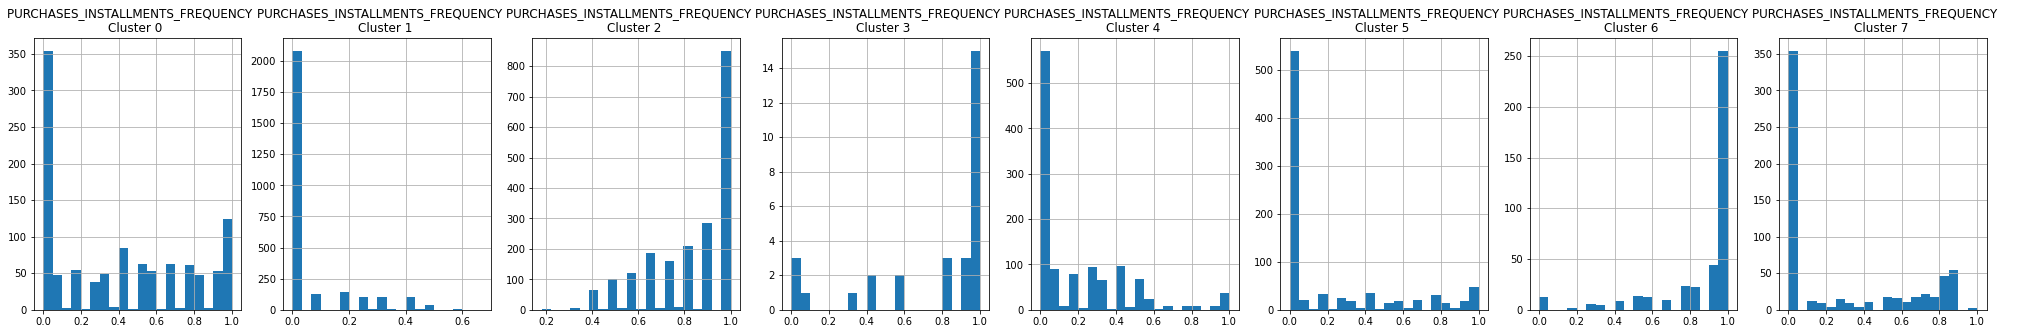

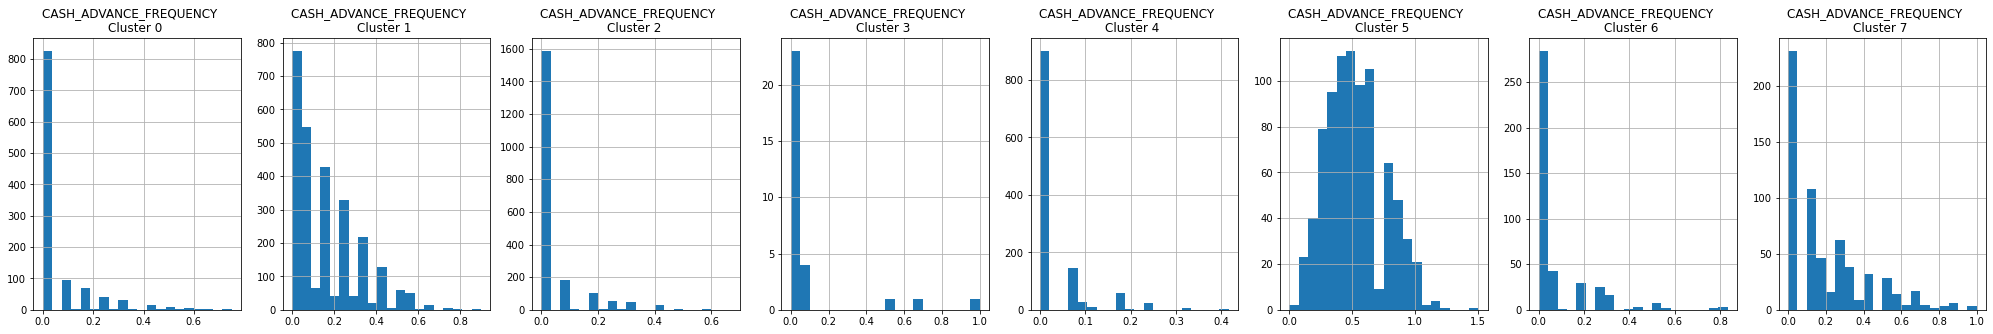

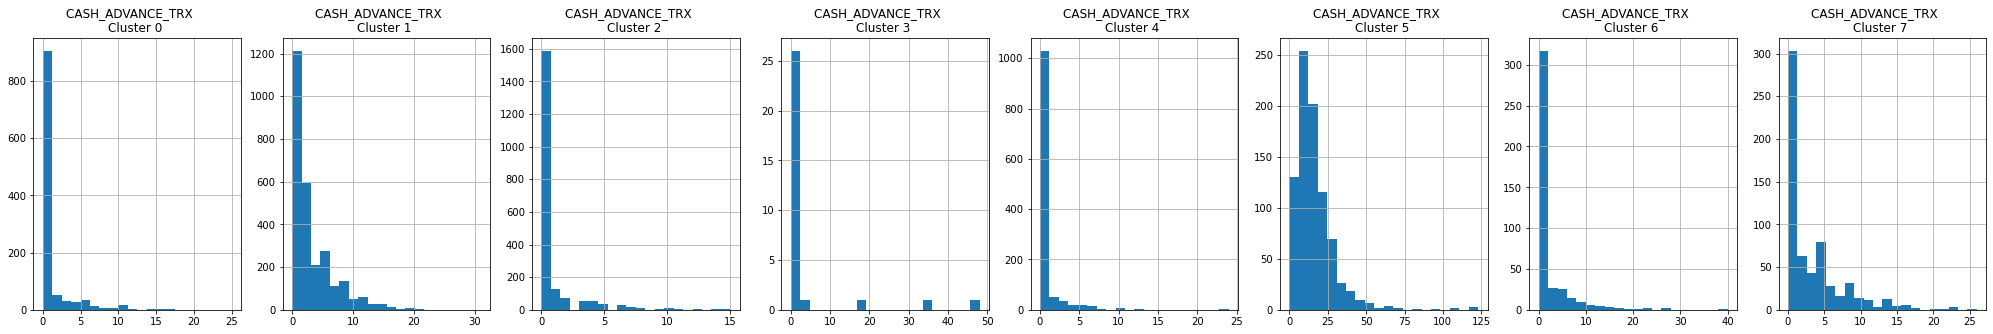

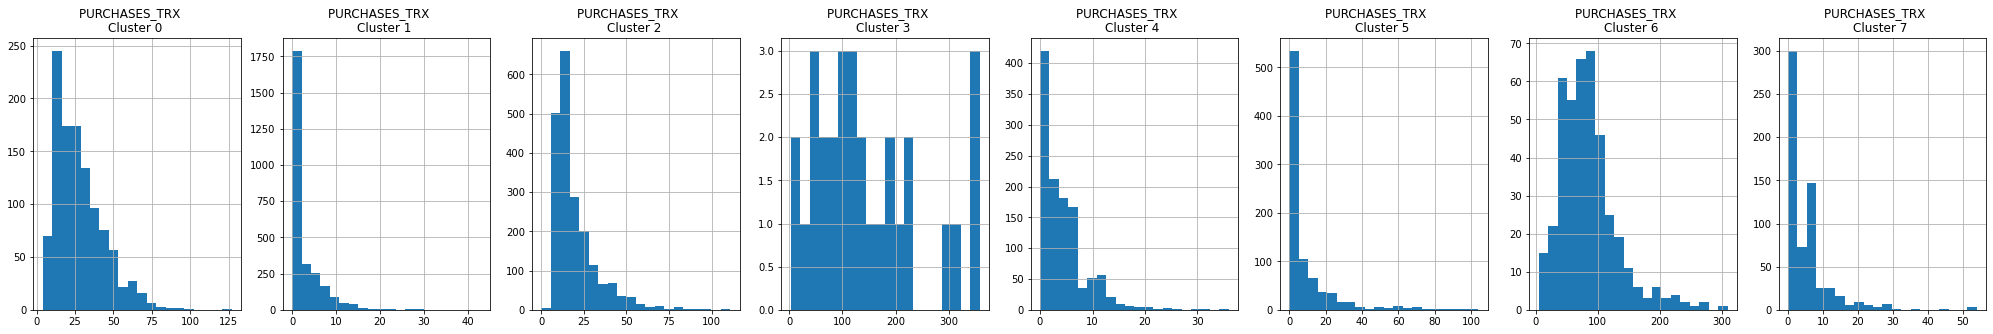

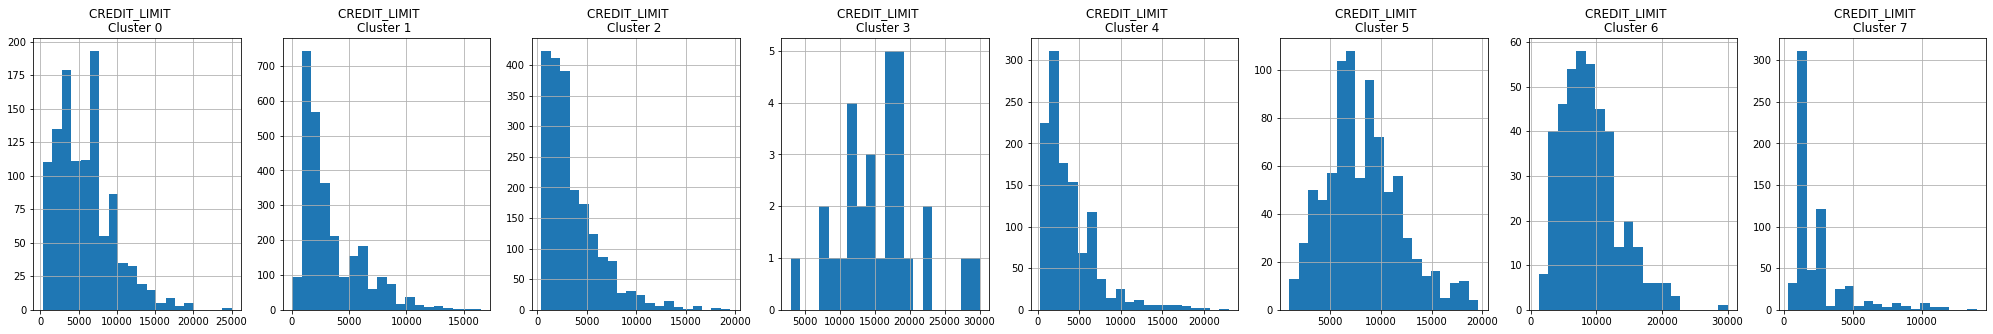

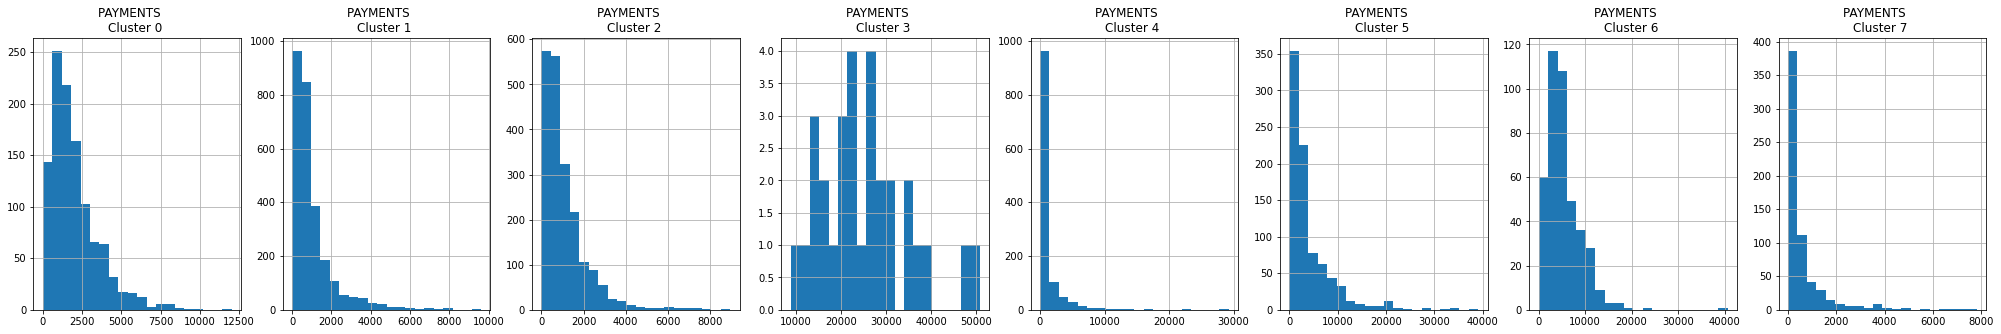

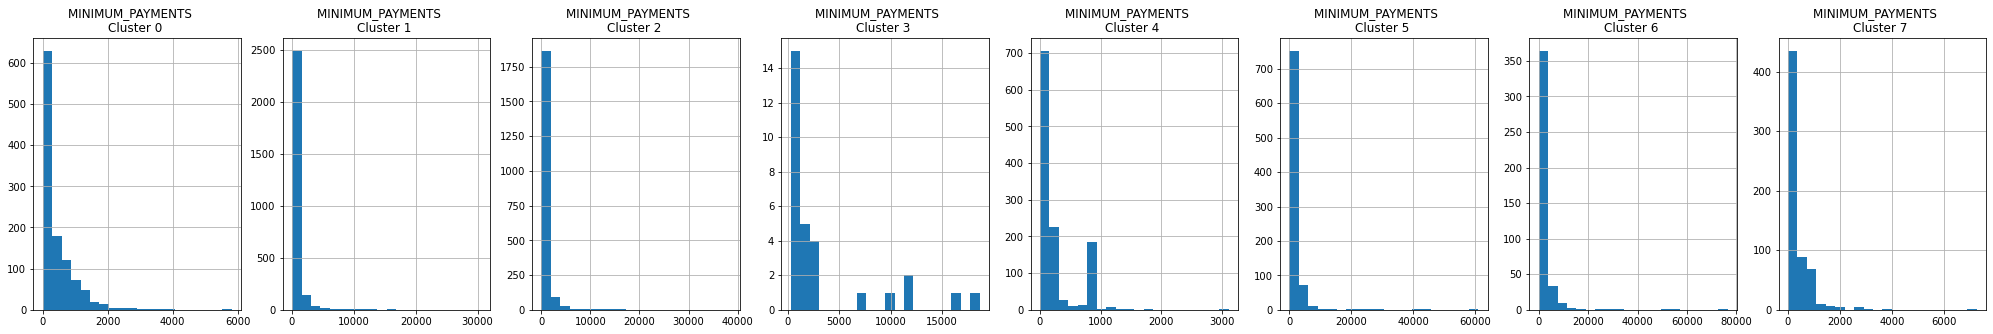

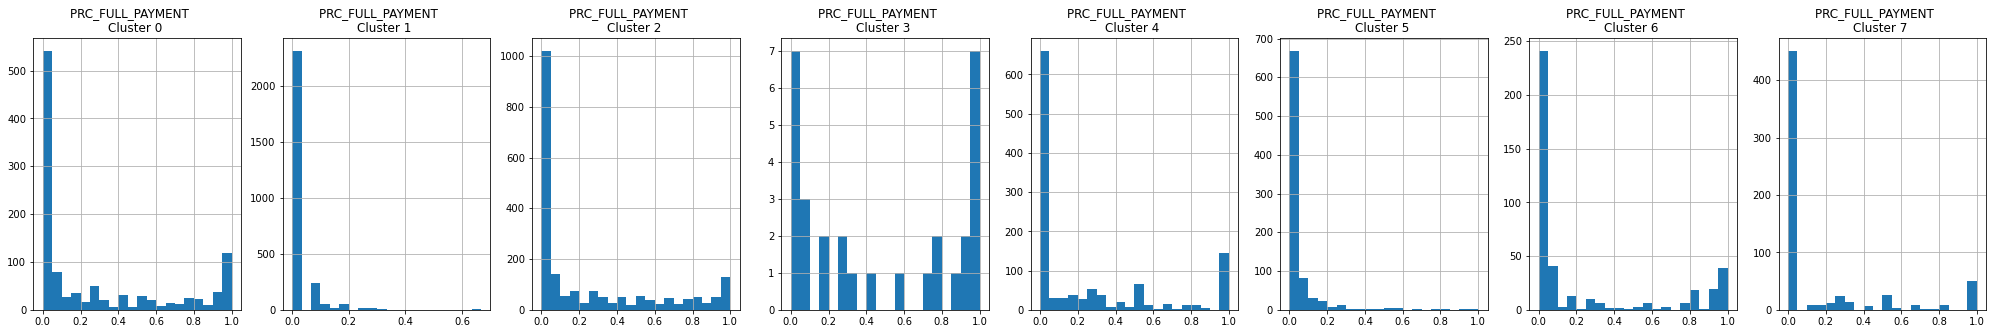

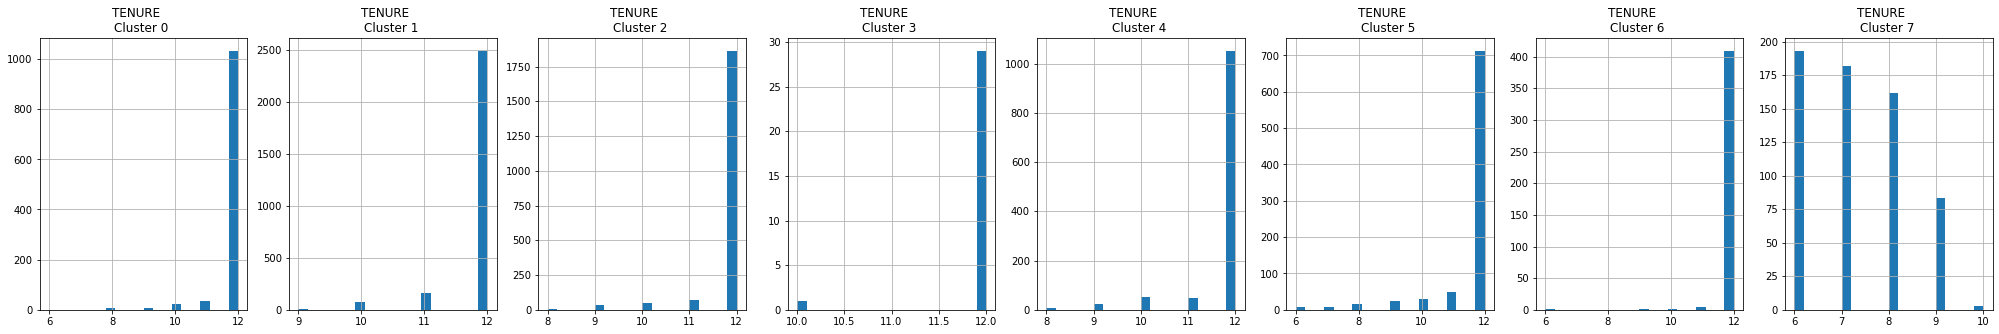

In [40]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

### Principal Component Analysis (PCA)

In [25]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682221 -1.076448        1
1 -1.138296  2.506484        5
2  0.969685 -0.383528        0
3 -0.873629  0.043170        1
4 -1.599434 -0.688580        1

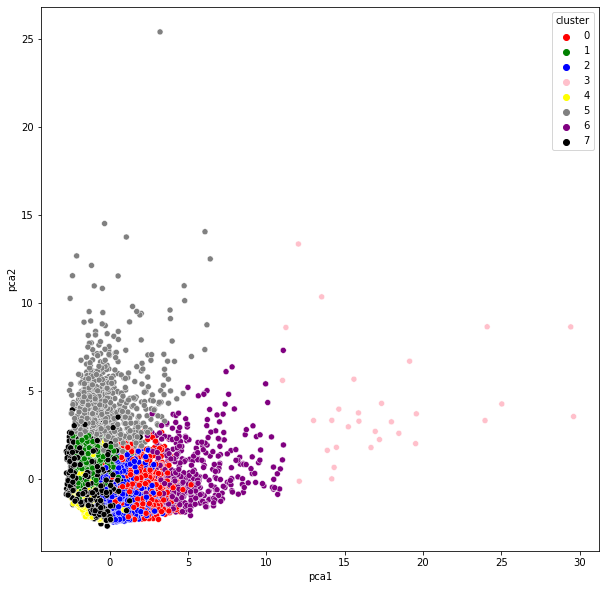

In [26]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

### Autoencoders models (Encoder and Decoder) for dimensionality reduction.

In [27]:
import tensorflow as tf
for gpu in tf.config.experimental.list_physical_devices("GPU"):
    tf.config.experimental.set_memory_growth(gpu, True)
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7
input_df = Input(shape=(17,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)
#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [29]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 256, epochs = 50,  verbose = 1)

Epoch 1/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1586
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1495
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1420A: 0s - loss: 0.142
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1397
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1394
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1385
Epoch 8/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1367
Epoch 9/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1350
Epoch 10/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1346
Epoch 11/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1341
Epoch 12/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 13/50
35/35 [===========

In [30]:
autoencoder.save_weights('autoencoder.h5')

In [31]:
pred = encoder.predict(creditcard_df_scaled)
pred.shape, creditcard_df_scaled.shape

((8950, 10), (8950, 17))

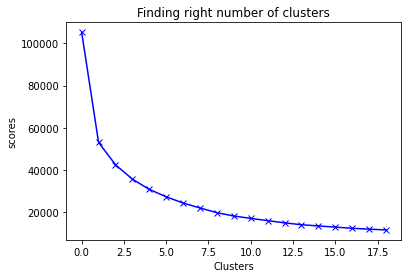

In [32]:
scores_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)
plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

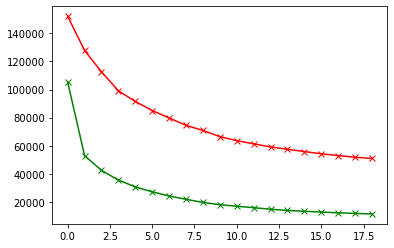

In [33]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [35]:
# Choose cluster k=4
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        2  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        864.206542          0.000000      12        2  
4   678.334763        244.791237          0.000000      12        2

In [45]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.429050 -0.287649        2
1 -0.215156  2.136558        1
2  0.469859 -0.597216        0
3 -1.581679 -0.094484        2
4 -1.498503  0.131133        2

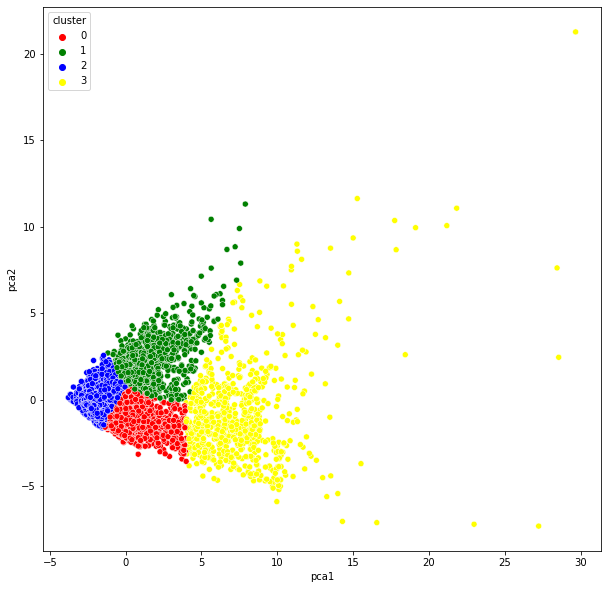

In [46]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()